El objetivo de esta actividad lo planteo en tener informacion de las ligas que se realizan en colombia y que tipo de datos se generan de forma gratuita inicialmente, la idea es conocer datos de baloncesto y fubol. 
La idea es generarl un canal de presentacion de informacion en cuanto a torneo, estadisticas de equipos y estadisticas de jugadores.

Parte 1: Configuración Inicial y Clase ColombianFootballAPI

Crear la clase con la versión v2 de la API-Football

Confirmamos que datos y acceso tenemos dento de API-SPORT para tener acceso a todos los deportes que ofrecen.

In [1]:
import http.client
import json
import pandas as pd
import requests
import os
from datetime import datetime  # ← Agregar esta línea para corregir el error


# Configuración de la API
api_url = "https://v3.football.api-sports.io/status"
headers = {
    "x-apisports-key": "2353549f2fd884771125bd289be57c47"
}

# Solicitud a la API
response = requests.get(api_url, headers=headers)
data = response.json()

# Manejo de la respuesta
if response.status_code == 200 and 'response' in data:
    status = data['response']
    
    # Extraer información relevante
    account = status['account']
    subscription = status['subscription']
    requests_info = status['requests']
    
    print("Información de la cuenta:")
    print(f"Nombre: {account['firstname']} {account['lastname']}")
    print(f"Correo: {account['email']}")
    print("\nInformación de suscripción:")
    print(f"Plan: {subscription['plan']}")
    print(f"Activo: {'Sí' if subscription['active'] else 'No'}")
    print(f"Fin del plan: {subscription['end']}")
    print("\nUso de solicitudes:")
    print(f"Solicitudes actuales: {requests_info['current']}")
    print(f"Límite diario: {requests_info['limit_day']}")
else:
    print("Error al obtener el estado de la cuenta:", data.get("errors", "Desconocido"))


Información de la cuenta:
Nombre: ALEJANDRO NAVARRO RINCON
Correo: navarroalejo@hotmail.com

Información de suscripción:
Plan: Free
Activo: Sí
Fin del plan: 2025-12-16T00:00:00+00:00

Uso de solicitudes:
Solicitudes actuales: 0
Límite diario: 100


Mapa de distribución detro de API-FOOTBALL

![arquitectura API-FOOTBALL.jpg](<attachment:arquitectura API-FOOTBALL.jpg>)
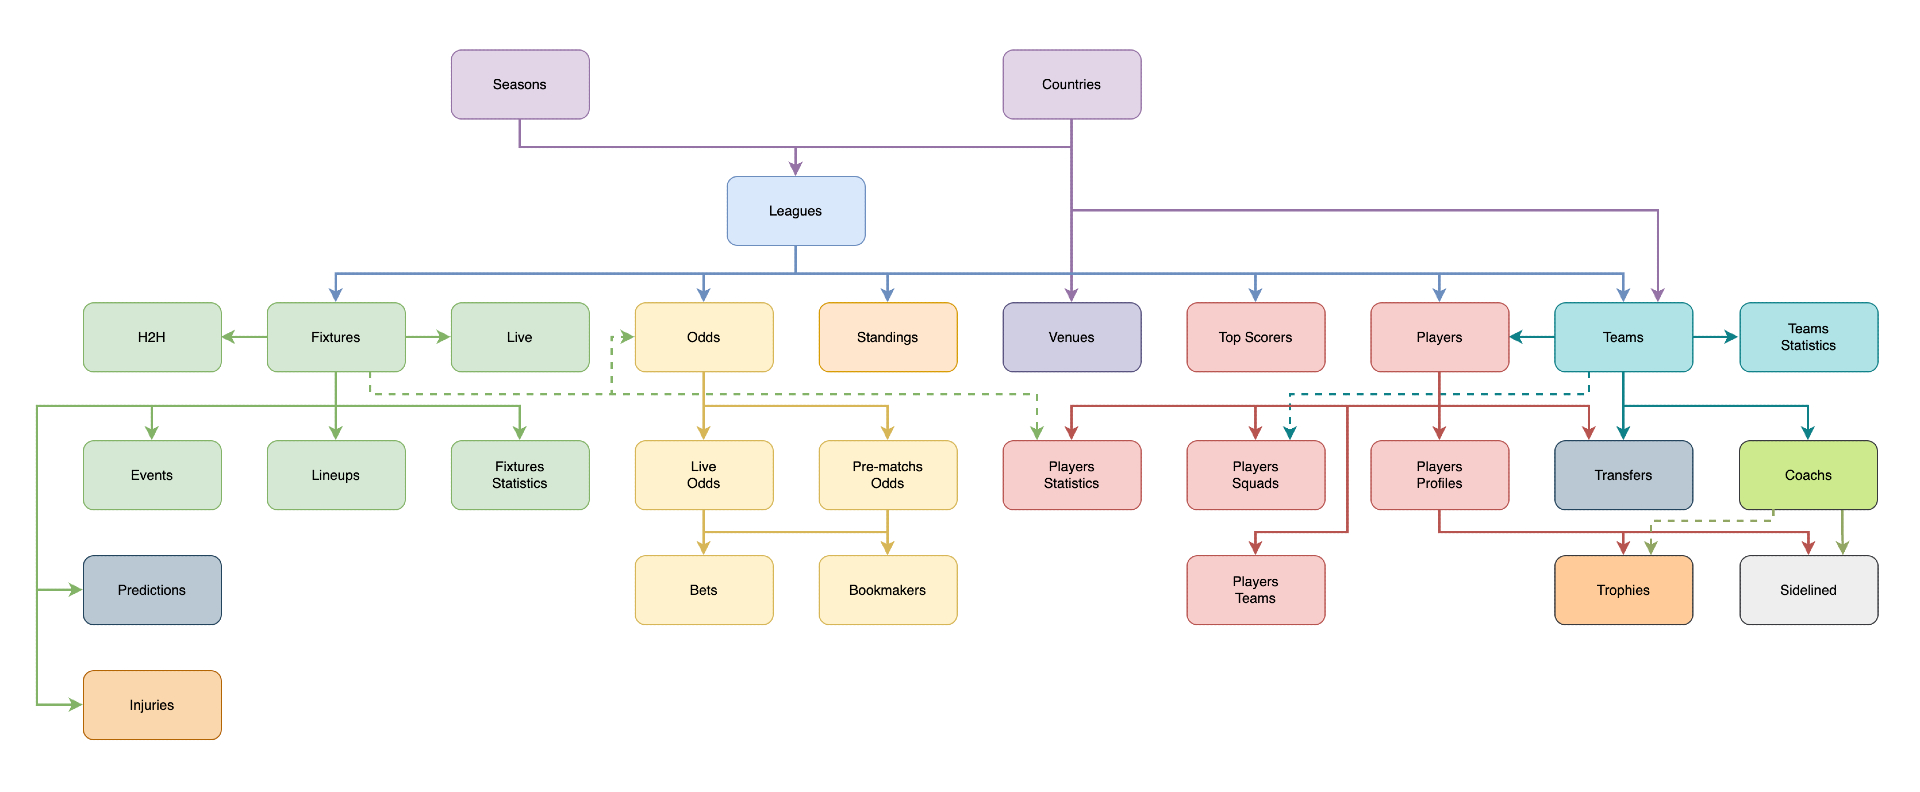

**PASO 1**

Confirmamos el acceso a API-FOOTBALL pidiendo información de todas las ligas.


In [2]:
def get_leagues(api_key, host="v3.football.api-sports.io"):
    """
    Realiza una solicitud GET al endpoint /leagues para obtener las ligas.
    Params:
        api_key (str): Clave API para autenticación.
        host (str): Host de la API. Por defecto 'v3.football.api-sports.io'.
    Returns:
        dict: Respuesta en formato JSON si tiene éxito, None en caso de error.
    """
    try:
        # Configuración de la conexión
        conn = http.client.HTTPSConnection(host)

        # Configuración de las cabeceras
        headers = {
            'x-apisports-key': api_key,  # Para la API Deportes
        }

        # Realizamos la solicitud GET
        conn.request("GET", "/leagues", headers=headers)

        # Obtenemos la respuesta
        res = conn.getresponse()
        data = res.read()

        # Convertimos la respuesta a JSON
        response_json = json.loads(data.decode("utf-8"))

        # Verificamos si la respuesta contiene datos
        if res.status == 200:
            print("Solicitud exitosa. Ligas obtenidas:")
            return response_json
        else:
            print(f"Error en la solicitud: {res.status} - {res.reason}")
            print(response_json)
            return None

    except Exception as e:
        print(f"Error en la conexión: {e}")
        return None

    finally:
        conn.close()


# Prueba del código
if __name__ == "__main__":
    api_key = "2353549f2fd884771125bd289be57c47"  # Reemplaza con tu clave API válida
    host = "v3.football.api-sports.io"  # API Deportes

    # Llamada a la función
    leagues_data = get_leagues(api_key, host)

    # Procesamos los datos si la respuesta es válida
    if leagues_data and "response" in leagues_data:
        print("Ligas Encontradas:")
        for league in leagues_data["response"]:
            print(f"ID: {league['league']['id']}, Nombre: {league['league']['name']}, País: {league['country']['name']}")
    else:
        print("No se obtuvieron datos.")


Solicitud exitosa. Ligas obtenidas:
Ligas Encontradas:
ID: 4, Nombre: Euro Championship, País: World
ID: 21, Nombre: Confederations Cup, País: World
ID: 61, Nombre: Ligue 1, País: France
ID: 144, Nombre: Jupiler Pro League, País: Belgium
ID: 71, Nombre: Serie A, País: Brazil
ID: 39, Nombre: Premier League, País: England
ID: 78, Nombre: Bundesliga, País: Germany
ID: 135, Nombre: Serie A, País: Italy
ID: 88, Nombre: Eredivisie, País: Netherlands
ID: 94, Nombre: Primeira Liga, País: Portugal
ID: 140, Nombre: La Liga, País: Spain
ID: 179, Nombre: Premiership, País: Scotland
ID: 180, Nombre: Championship, País: Scotland
ID: 1, Nombre: World Cup, País: World
ID: 803, Nombre: Asian Games, País: World
ID: 804, Nombre: Caribbean Cup, País: World
ID: 62, Nombre: Ligue 2, País: France
ID: 2, Nombre: UEFA Champions League, País: World
ID: 311, Nombre: 1st Division, País: Albania
ID: 310, Nombre: Superliga, País: Albania
ID: 186, Nombre: Ligue 1, País: Algeria
ID: 187, Nombre: Ligue 2, País: Algeri

**PASO 2**

Generar un DataFrame con las columnas ID, Nombre, País y filtrar solo las ligas de Colombia, a partir de la respuesta JSON obtenida.

Extraer Datos Relevantes:

Usamos una lista de comprensión para iterar sobre la clave "response" en la respuesta JSON.

1. Extraemos las columnas:
ID: league["league"]["id"]
Nombre: league["league"]["name"]
País: league["country"]["name"]
Aplicamos el filtro if league["country"]["name"] == "Colombia" para incluir solo las ligas de Colombia.

2. Crear el DataFrame:

Convertimos la lista de diccionarios a un DataFrame usando pd.DataFrame.

3. Guardar en CSV (ligas_colombia.csv):

Guardamos los datos en un archivo CSV llamado ligas_colombia.csv para su uso posterior.

4. Mostrar el DataFrame:

Imprimimos el DataFrame en la consola.

In [3]:

# Configuración de la API
# Procesamos los datos si la respuesta es válida
if leagues_data and "response" in leagues_data:
    # Extraer datos relevantes y guardarlos en una lista
    leagues_list = [
        {
            "ID": league["league"]["id"],
            "Nombre": league["league"]["name"],
            "País": league["country"]["name"]
        }
        for league in leagues_data["response"]
        if league["country"]["name"] == "Colombia"  # Filtramos solo "Colombia"
    ]

    # Convertir la lista a un DataFrame
    leagues_df = pd.DataFrame(leagues_list)

    # Mostrar el DataFrame
    print("Ligas de Colombia en DataFrame:")
    print(leagues_df)

    # Crear el directorio si no existe
    output_dir = "datos_futbol"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Guardar el archivo en la carpeta /datos_futbol
    file_path = os.path.join(output_dir, "ligas_colombia.csv")
    leagues_df.to_csv(file_path, index=False)
    print(f"Datos exportados a '{file_path}'.")
else:
    print("No se obtuvieron datos para procesar.")


Ligas de Colombia en DataFrame:
    ID         Nombre      País
0  239      Primera A  Colombia
1  240      Primera B  Colombia
2  241  Copa Colombia  Colombia
3  712  Liga Femenina  Colombia
4  713      Superliga  Colombia
Datos exportados a 'datos_futbol/ligas_colombia.csv'.


**PASO 3:**

Obtener los datos de los partidos de una Liga.

El EndPoint se debe usar /fixtues

Toma los datos del Equipo Local, Equipo Visitante y los marcadores. La temporada actual no permite extraer los datos de forma gratuita. Se genera al final de los 3 codigos un archivo, Partidos_liga_(temporada).


In [4]:
# Función para obtener los partidos de una liga y temporada
def get_fixtures(api_key, league_id, season, host="v3.football.api-sports.io"):
    """
    Obtiene todos los partidos de una liga específica para una temporada dada.
    Params:
        api_key (str): Clave API para autenticación.
        league_id (int): ID de la liga.
        season (int): Año de la temporada. Tener en cuenta que solo habilita 2 años antes
        host (str): Host de la API Sports.
    Returns:
        dict: Respuesta JSON con los datos de los partidos.
    """
    try:
        # URL base y cabeceras
        url = f"https://{host}/fixtures"
        headers = {
            'x-apisports-key': api_key
        }
        # Parámetros de la solicitud
        params = {
            "league": league_id,
            "season": season
        }
        
        # Realizar la solicitud GET
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()  # Genera un error si el estado no es 200
        
        # Convertir la respuesta a JSON
        data = response.json()
        return data
    
    except requests.exceptions.RequestException as e:
        print(f"Error en la solicitud: {e}")
        return None

get_fixtures(api_key, 239, 2023, host) # tener en cuenta que sobre la liga que se juega no da informacion

{'get': 'fixtures',
 'parameters': {'league': '239', 'season': '2023'},
 'errors': [],
 'results': 452,
 'paging': {'current': 1, 'total': 1},
 'response': [{'fixture': {'id': 987695,
    'referee': 'S. Camargo',
    'timezone': 'UTC',
    'date': '2023-01-25T01:00:00+00:00',
    'timestamp': 1674608400,
    'periods': {'first': 1674608400, 'second': 1674612000},
    'venue': {'id': 369,
     'name': 'Estadio Alfonso López',
     'city': 'Bucaramanga'},
    'status': {'long': 'Match Finished',
     'short': 'FT',
     'elapsed': 90,
     'extra': None}},
   'league': {'id': 239,
    'name': 'Primera A',
    'country': 'Colombia',
    'logo': 'https://media.api-sports.io/football/leagues/239.png',
    'flag': 'https://media.api-sports.io/flags/co.svg',
    'season': 2023,
    'round': 'Apertura - 1',
    'standings': True},
   'teams': {'home': {'id': 1131,
     'name': 'Bucaramanga',
     'logo': 'https://media.api-sports.io/football/teams/1131.png',
     'winner': None},
    'away': {

In [5]:
# Configuración inicial de liga por pais
# 
api_key = "2353549f2fd884771125bd289be57c47"  # Clave API válida
league_id = 239  # ID de la liga (Primera A de Colombia)
season = 2023    # Año de la temporada

# Llamada a la función
fixtures_data = get_fixtures(api_key, league_id, season)

# Mostrar una parte de la respuesta
if fixtures_data and "response" in fixtures_data:
    print("Datos de los partidos obtenidos:")
    for fixture in fixtures_data["response"][:5]:  # Mostramos solo los primeros 5 partidos
        print(f"Fecha: {fixture['fixture']['date']}, "
              f"Local: {fixture['teams']['home']['name']}, "
              f"Visitante: {fixture['teams']['away']['name']}, "
              f"Resultado: {fixture['goals']['home']} - {fixture['goals']['away']}")
else:
    print("No se obtuvieron datos de partidos.")




Datos de los partidos obtenidos:
Fecha: 2023-01-25T01:00:00+00:00, Local: Bucaramanga, Visitante: Envigado, Resultado: 0 - 0
Fecha: 2023-01-25T20:10:00+00:00, Local: Union Magdalena, Visitante: Huila, Resultado: 2 - 1
Fecha: 2023-01-25T22:20:00+00:00, Local: Rionegro Aguilas, Visitante: Junior, Resultado: 1 - 1
Fecha: 2023-01-26T21:00:00+00:00, Local: Chico, Visitante: Alianza Petrolera, Resultado: 2 - 0
Fecha: 2023-01-27T01:20:00+00:00, Local: Atletico Nacional, Visitante: Once Caldas, Resultado: 1 - 0


In [6]:
# Procesar y mostrar los datos
if fixtures_data and "response" in fixtures_data:
    matches_list = [
        {
            "Fecha": fixture["fixture"]["date"],
            "Equipo Local": fixture["teams"]["home"]["name"],
            "Equipo Visitante": fixture["teams"]["away"]["name"],
            "Goles Local": fixture["goals"]["home"],
            "Goles Visitante": fixture["goals"]["away"],
            "Estado": fixture["fixture"]["status"]["long"]
        }
        for fixture in fixtures_data["response"]
    ]

    # Crear DataFrame
    fixtures_df = pd.DataFrame(matches_list)
    print("DataFrame de Partidos:")
    print(fixtures_df)

    # Crear el directorio si no existe
    output_dir = "datos_futbol"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Guardar el archivo en la carpeta /datos_futbol
    file_path = os.path.join(output_dir, f"partidos_liga_{league_id}_temporada_{season}.csv")
    fixtures_df.to_csv(file_path, index=False)
    print(f"Datos exportados a '{file_path}'.")
else:
    print("No se encontraron partidos para esta liga y temporada.")


DataFrame de Partidos:
                         Fecha            Equipo Local  \
0    2023-01-25T01:00:00+00:00             Bucaramanga   
1    2023-01-25T20:10:00+00:00         Union Magdalena   
2    2023-01-25T22:20:00+00:00        Rionegro Aguilas   
3    2023-01-26T21:00:00+00:00                   Chico   
4    2023-01-27T01:20:00+00:00       Atletico Nacional   
..                         ...                     ...   
447  2023-12-06T23:00:00+00:00        Rionegro Aguilas   
448  2023-12-07T01:15:00+00:00  Independiente Medellin   
449  2023-12-07T01:15:00+00:00                  Junior   
450  2023-12-10T21:00:00+00:00                  Junior   
451  2023-12-14T01:00:00+00:00  Independiente Medellin   

           Equipo Visitante  Goles Local  Goles Visitante          Estado  
0                  Envigado            0                0  Match Finished  
1                     Huila            2                1  Match Finished  
2                    Junior            1            

In [7]:
# Mostrar los primeros 2 partidos
if fixtures_data and "response" in fixtures_data:
    print("Datos devueltos por la API:")
    print(json.dumps(fixtures_data["response"][:2], indent=4))  # Muestra los primeros 2 partidos
else:
    print("No se devolvieron datos.")


Datos devueltos por la API:
[
    {
        "fixture": {
            "id": 987695,
            "referee": "S. Camargo",
            "timezone": "UTC",
            "date": "2023-01-25T01:00:00+00:00",
            "timestamp": 1674608400,
            "periods": {
                "first": 1674608400,
                "second": 1674612000
            },
            "venue": {
                "id": 369,
                "name": "Estadio Alfonso L\u00f3pez",
                "city": "Bucaramanga"
            },
            "status": {
                "long": "Match Finished",
                "short": "FT",
                "elapsed": 90,
                "extra": null
            }
        },
        "league": {
            "id": 239,
            "name": "Primera A",
            "country": "Colombia",
            "logo": "https://media.api-sports.io/football/leagues/239.png",
            "flag": "https://media.api-sports.io/flags/co.svg",
            "season": 2023,
            "round": "Apertura

**PASO 4**

Pedimos los EQUIPOS de toda liga con su respectivo ID y cargamos segun la temporada

In [9]:
# Configuración de la conexión
conn = http.client.HTTPSConnection(host)

# Configuración de las cabeceras
headers = {
    'x-apisports-key': api_key,  # Para la API Deportes
}
# Configuración inicial de liga por pais
# Configuración de la temporada
season = 2023  # Puedes cambiar a 2022 si es necesario

# Realizar la solicitud GET
conn.request("GET", f"/teams?league={league_id}&season={season}", headers=headers)

# Obtener la respuesta
res = conn.getresponse()
data = res.read()

# Convertir la respuesta a JSON
teams_data = json.loads(data.decode("utf-8"))

# Verificar y procesar los datos
if "response" in teams_data and teams_data["response"]:
    teams_list = [
        {
            "ID Equipo": team["team"]["id"],
            "Nombre Equipo": team["team"]["name"],
            "Logo": team["team"]["logo"]
        }
        for team in teams_data["response"]
    ]

    # Crear DataFrame
    teams_df = pd.DataFrame(teams_list)
    print("Equipos obtenidos:")
    print(teams_df.head())

    # Crear el directorio si no existe
    output_dir = "datos_futbol"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Guardar el archivo en la carpeta /datos_futbol
    file_path = os.path.join(output_dir, f"Teams_{league_id}_{season}.csv")
    teams_df.to_csv(file_path, index=False)
    print(f"Datos exportados a '{file_path}'.")
else:
    print("No se encontraron equipos para la liga y temporada especificadas.")


Equipos obtenidos:
   ID Equipo           Nombre Equipo  \
0       1125             Millonarios   
1       1126         Deportivo Pasto   
2       1127          Deportivo Cali   
3       1128  Independiente Medellin   
4       1129                Envigado   

                                                Logo  
0  https://media.api-sports.io/football/teams/112...  
1  https://media.api-sports.io/football/teams/112...  
2  https://media.api-sports.io/football/teams/112...  
3  https://media.api-sports.io/football/teams/112...  
4  https://media.api-sports.io/football/teams/112...  
Datos exportados a 'datos_futbol/Teams_239_2023.csv'.


**PASO 5** Estadisica de los jugadores

Se cargan los datos de estadistica jugadores de la Liga 239 (Primera A) para el año 2023

In [10]:
# Función para obtener las estadísticas de jugadores de un equipo y temporada

def get_players_statistics(api_key, team_id, season, host="v3.football.api-sports.io"):
    """
    Obtiene las estadísticas de jugadores de un equipo específico en una temporada dada.
    Params:
        api_key (str): Clave API para autenticación.
        team_id (int): ID del equipo.
        season (int): Año de la temporada.
        host (str): Host de la API.
    Returns:
        dict: Respuesta JSON con las estadísticas de jugadores.
    """
    try:
        # URL base y cabeceras
        url = f"https://{host}/players"
        headers = {
            'x-apisports-key': api_key
        }
        # Parámetros de la solicitud
        params = {
            "id": team_id,
            "season": season
        }

        # Realizar la solicitud GET
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()  # Genera un error si el estado no es 200

        # Convertir la respuesta a JSON
        return response.json()

    except requests.exceptions.RequestException as e:
        print(f"Error en la solicitud: {e}")
        return None
    

get_players_statistics(api_key, 239 , 2023, host="v3.football.api-sports.io")




{'get': 'players',
 'parameters': {'id': '239', 'season': '2023'},
 'errors': [],
 'results': 1,
 'paging': {'current': 1, 'total': 1},
 'response': [{'player': {'id': 239,
    'name': 'D. Rigo',
    'firstname': 'Dante',
    'lastname': 'Rigo',
    'age': 27,
    'birth': {'date': '1998-12-11', 'place': 'Tremelo', 'country': 'Belgium'},
    'nationality': 'Belgium',
    'height': '180 cm',
    'weight': '72 kg',
    'injured': False,
    'photo': 'https://media.api-sports.io/football/players/239.png'},
   'statistics': [{'team': {'id': 101,
      'name': 'Grenoble',
      'logo': 'https://media.api-sports.io/football/teams/101.png'},
     'league': {'id': 62,
      'name': 'Ligue 2',
      'country': 'France',
      'logo': 'https://media.api-sports.io/football/leagues/62.png',
      'flag': 'https://media.api-sports.io/flags/fr.svg',
      'season': 2023},
     'games': {'appearences': 37,
      'lineups': 33,
      'minutes': 2955,
      'number': None,
      'position': 'Midfielder

prueba 6 

REcoge la estadistica de todos los partidos de todos los equipos de la liga.

In [11]:

### 🔹 FUNCIÓN PARA OBTENER TODOS LOS EQUIPOS DE UNA LIGA EN UNA TEMPORADA
def get_teams_in_league(api_key, league_id, season, host="v3.football.api-sports.io"):
    """
    Obtiene la lista de equipos en una liga para una temporada específica.
    """
    try:
        url = f"https://{host}/teams"
        headers = {
            'x-apisports-key': api_key
        }
        params = {
            "league": league_id,
            "season": season
        }

        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"❌ Error en la solicitud de equipos: {e}")
        return None

### 🔹 FUNCIÓN PARA OBTENER LAS ESTADÍSTICAS DE LOS JUGADORES DE UN EQUIPO
def get_players_statistics(api_key, team_id, season, host="v3.football.api-sports.io"):
    """
    Obtiene todas las estadísticas detalladas de los jugadores de un equipo en una temporada específica.
    """
    try:
        url = f"https://{host}/players"
        headers = {
            'x-apisports-key': api_key
        }
        params = {
            "team": team_id,
            "season": season,
            "page": 1
        }

        all_players_data = []

        # Manejo de paginación para obtener todos los jugadores disponibles
        while True:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()
            data = response.json()

            if not data.get("response"):
                break  # Si no hay más jugadores, termina el bucle

            all_players_data.extend(data["response"])

            # Verificar si hay más páginas de datos
            if params["page"] >= data.get("paging", {}).get("total", 1):
                break

            params["page"] += 1

        return {"response": all_players_data}
    except requests.exceptions.RequestException as e:
        print(f"❌ Error en la solicitud de jugadores: {e}")
        return None

### 🔹 FUNCIÓN PARA GUARDAR LOS DATOS EN UN ARCHIVO CSV
def create_csv(players_data, output_dir="data"):
    """
    Crea un archivo CSV con todas las estadísticas obtenidas de los jugadores.
    """
    if not players_data or "response" not in players_data:
        print("⚠️ No hay datos para procesar.")
        return None

    players_list = []
    
    for player in players_data["response"]:
        for stats in player["statistics"]:
            player_info = {
                # Datos personales
                "id_jugador": player["player"].get("id"),
                "nombre": player["player"].get("name"),
                "apellido": player["player"].get("lastname"),
                "edad": player["player"].get("age"),
                "fecha_nacimiento": player["player"].get("birth", {}).get("date"),
                "lugar_nacimiento": player["player"].get("birth", {}).get("place"),
                "pais_nacimiento": player["player"].get("birth", {}).get("country"),
                "nacionalidad": player["player"].get("nationality"),
                "altura": player["player"].get("height"),
                "peso": player["player"].get("weight"),
                "lesionado": player["player"].get("injured"),
                "foto": player["player"].get("photo"),
                
                # Información del equipo y liga
                "id_equipo": stats.get("team", {}).get("id"),
                "nombre_equipo": stats.get("team", {}).get("name"),
                "logo_equipo": stats.get("team", {}).get("logo"),
                "id_liga": stats.get("league", {}).get("id"),
                "nombre_liga": stats.get("league", {}).get("name"),
                "pais_liga": stats.get("league", {}).get("country"),
                "logo_liga": stats.get("league", {}).get("logo"),
                "temporada": stats.get("league", {}).get("season"),
                
                # Estadísticas de juego
                "posicion": stats.get("games", {}).get("position"),
                "partidos_jugados": stats.get("games", {}).get("appearances", 0),
                "partidos_titular": stats.get("games", {}).get("lineups", 0),
                "minutos_jugados": stats.get("games", {}).get("minutes", 0),
                "rating": stats.get("games", {}).get("rating"),
                "capitan": stats.get("games", {}).get("captain"),
                
                # Goles
                "goles_total": stats.get("goals", {}).get("total", 0),
                "goles_concedidos": stats.get("goals", {}).get("conceded", 0),
                "asistencias": stats.get("goals", {}).get("assists", 0),
                "salvadas": stats.get("goals", {}).get("saves", 0),
                
                # Pases
                "pases_total": stats.get("passes", {}).get("total", 0),
                "pases_key": stats.get("passes", {}).get("key", 0),
                "pases_precision": stats.get("passes", {}).get("accuracy", 0),
                
                # Tiros
                "tiros_total": stats.get("shots", {}).get("total", 0),
                "tiros_al_arco": stats.get("shots", {}).get("on", 0),
                
                # Goles por tipo
                "goles_pie_izq": stats.get("goals", {}).get("left", 0),
                "goles_pie_der": stats.get("goals", {}).get("right", 0),
                "goles_cabeza": stats.get("goals", {}).get("head", 0),
                "goles_otros": stats.get("goals", {}).get("other", 0),
                
                # Disciplina
                "tarjetas_amarillas": stats.get("cards", {}).get("yellow", 0),
                "tarjetas_rojas": stats.get("cards", {}).get("red", 0),
                "tarjetas_doble_amarilla": stats.get("cards", {}).get("yellowred", 0),
                
                # Penales
                "penales_anotados": stats.get("penalty", {}).get("scored", 0),
                "penales_fallados": stats.get("penalty", {}).get("missed", 0),
                "penales_atajados": stats.get("penalty", {}).get("saved", 0),
                
                # Regates
                "regates_intentos": stats.get("dribbles", {}).get("attempts", 0),
                "regates_exitosos": stats.get("dribbles", {}).get("success", 0),
                "regates_fallidos": stats.get("dribbles", {}).get("past", 0),
                
                # Duelos
                "duelos_total": stats.get("duels", {}).get("total", 0),
                "duelos_ganados": stats.get("duels", {}).get("won", 0),
                
                # Faltas
                "faltas_cometidas": stats.get("fouls", {}).get("committed", 0),
                 "Duelos Ganados": stats.get("duels", {}).get("won", 0),
            }
            players_list.append(player_info)

    df = pd.DataFrame(players_list)

    # Crear directorio si no existe
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Nombre del archivo con timestamp
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = os.path.join(output_dir, f"estadisticas_jugadores_{timestamp}.csv")

    # Exportar a CSV
    df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"\n✅ Archivo CSV generado exitosamente: {filename}")
    print(f"📌 Total de registros: {len(df)}")
    
    return df

### 🔹 FUNCIÓN PRINCIPAL: OBTENER DATOS DE TODOS LOS EQUIPOS DE UNA LIGA
def main():
    # 🔥 CONFIGURACIÓN INICIAL
    API_KEY = "2353549f2fd884771125bd289be57c47"  # Clave de acceso a la API
    LEAGUE_ID = 239  # Liga BetPlay Dimayor (Ejemplo)
    SEASON = 2023  # Temporada a consultar
    all_players_data = {"response": []}

    print("🔄 Obteniendo la lista de equipos de la liga...")
    teams_data = get_teams_in_league(API_KEY, LEAGUE_ID, SEASON)

    if teams_data and "response" in teams_data:
        for team in teams_data["response"]:
            team_id = team["team"]["id"]
            team_name = team["team"]["name"]
            print(f"📥 Obteniendo jugadores del equipo: {team_name} (ID {team_id})")

            # Obtener datos de jugadores para cada equipo
            players_data = get_players_statistics(API_KEY, team_id, SEASON)

            if players_data and "response" in players_data:
                all_players_data["response"].extend(players_data["response"])

    if all_players_data["response"]:
        print("📂 Procesando datos y generando CSV...")
        df = create_csv(all_players_data)
    else:
        print("❌ No se pudieron obtener datos de jugadores.")

# Ejecutar el script
if __name__ == "__main__":
    main()


🔄 Obteniendo la lista de equipos de la liga...
📥 Obteniendo jugadores del equipo: Millonarios (ID 1125)
📥 Obteniendo jugadores del equipo: Deportivo Pasto (ID 1126)
📥 Obteniendo jugadores del equipo: Deportivo Cali (ID 1127)
📥 Obteniendo jugadores del equipo: Independiente Medellin (ID 1128)
📥 Obteniendo jugadores del equipo: Envigado (ID 1129)
📥 Obteniendo jugadores del equipo: Huila (ID 1130)
📥 Obteniendo jugadores del equipo: Bucaramanga (ID 1131)
📥 Obteniendo jugadores del equipo: Chico (ID 1132)
📥 Obteniendo jugadores del equipo: Jaguares (ID 1133)
📥 Obteniendo jugadores del equipo: La Equidad (ID 1134)
📥 Obteniendo jugadores del equipo: Junior (ID 1135)
📥 Obteniendo jugadores del equipo: Once Caldas (ID 1136)
📥 Obteniendo jugadores del equipo: Atletico Nacional (ID 1137)
📥 Obteniendo jugadores del equipo: America de Cali (ID 1138)
📥 Obteniendo jugadores del equipo: Santa Fe (ID 1139)
📥 Obteniendo jugadores del equipo: Alianza Petrolera (ID 1141)
📥 Obteniendo jugadores del equipo:

In [14]:


### 🔹 FUNCIÓN PARA OBTENER TODOS LOS EQUIPOS DE UNA LIGA EN UNA TEMPORADA
def get_teams_in_league(api_key, league_id, season, host="v3.football.api-sports.io"):
    """ Obtiene la lista de equipos en una liga para una temporada específica. """
    try:
        url = f"https://{host}/teams"
        headers = {'x-apisports-key': api_key}
        params = {"league": league_id, "season": season}

        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"❌ Error en la solicitud de equipos: {e}")
        return None

### 🔹 FUNCIÓN PARA OBTENER LAS ESTADÍSTICAS DE JUGADORES DE UN EQUIPO
def get_players_statistics(api_key, team_id, season, host="v3.football.api-sports.io"):
    """ Obtiene todas las estadísticas detalladas de los jugadores de un equipo en una temporada específica. """
    try:
        url = f"https://{host}/players"
        headers = {'x-apisports-key': api_key}
        params = {"team": team_id, "season": season, "page": 1}

        all_players_data = []
        while True:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()
            data = response.json()

            if not data.get("response"):
                break  # No hay más jugadores, termina el bucle

            all_players_data.extend(data["response"])
            if params["page"] >= data.get("paging", {}).get("total", 1):
                break
            params["page"] += 1

        return {"response": all_players_data}
    except requests.exceptions.RequestException as e:
        print(f"❌ Error en la solicitud de jugadores: {e}")
        return None

### 🔹 FUNCIÓN PARA GUARDAR LOS DATOS EN UN ARCHIVO CSV
def create_csv(players_data, season, output_dir="data"):
    """ Crea un archivo CSV con todas las estadísticas obtenidas de los jugadores. """
    if not players_data or "response" not in players_data:
        print("⚠️ No hay datos para procesar.")
        return None

    players_list = []
    for player in players_data["response"]:
        for stats in player["statistics"]:
            player_info = {
                "ID Jugador": player["player"].get("id"),
                "Nombre": player["player"].get("name"),
                "Apellido": player["player"].get("lastname"),
                "Edad": player["player"].get("age"),
                "Fecha Nacimiento": player["player"].get("birth", {}).get("date"),
                "Nacionalidad": player["player"].get("nationality"),
                "Altura": player["player"].get("height"),
                "Peso": player["player"].get("weight"),
                "Lesionado": player["player"].get("injured"),
                "Foto": player["player"].get("photo"),
                "ID Equipo": stats.get("team", {}).get("id"),
                "Nombre Equipo": stats.get("team", {}).get("name"),
                "ID Liga": stats.get("league", {}).get("id"),
                "Nombre Liga": stats.get("league", {}).get("name"),
                "Temporada": stats.get("league", {}).get("season"),
                "Posición": stats.get("games", {}).get("position"),
                "Partidos Jugados": stats.get("games", {}).get("appearances", 0),
                "Minutos Jugados": stats.get("games", {}).get("minutes", 0),
                "Goles": stats.get("goals", {}).get("total", 0),
                "Asistencias": stats.get("goals", {}).get("assists", 0),
                "Tarjetas Amarillas": stats.get("cards", {}).get("yellow", 0),
                "Tarjetas Rojas": stats.get("cards", {}).get("red", 0),
                "Duelos Totales": stats.get("duels", {}).get("total", 0),
                "Duelos Ganados": stats.get("duels", {}).get("won", 0),
            }
            players_list.append(player_info)

    df = pd.DataFrame(players_list)

    # Crear directorio /data si no existe
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # 📌 Guardar el archivo con el nombre correcto basado en la temporada
    filename = os.path.join(output_dir, f"estadisticas_jugadores_{season}.csv")

    # Exportar a CSV
    df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"\n✅ Archivo CSV generado exitosamente: {filename}")
    print(f"📌 Total de registros: {len(df)}")
    
    return df

### 🔹 FUNCIÓN PRINCIPAL: OBTENER DATOS DE TODOS LOS EQUIPOS DE UNA LIGA

API_KEY = "2353549f2fd884771125bd289be57c47"
LEAGUE_ID = 239  # Liga BetPlay Dimayor
SEASON = 2023
all_players_data = {"response": []}

print("🔄 Obteniendo la lista de equipos de la liga...")
teams_data = get_teams_in_league(API_KEY, LEAGUE_ID, SEASON)





🔄 Obteniendo la lista de equipos de la liga...


In [15]:
teams_data

{'get': 'teams',
 'parameters': {'league': '239', 'season': '2023'},
 'errors': [],
 'results': 20,
 'paging': {'current': 1, 'total': 1},
 'response': [{'team': {'id': 1125,
    'name': 'Millonarios',
    'code': 'MIL',
    'country': 'Colombia',
    'founded': 1946,
    'national': False,
    'logo': 'https://media.api-sports.io/football/teams/1125.png'},
   'venue': {'id': 383,
    'name': 'Estadio Nemesio Camacho El Campín',
    'address': 'Avenida N.Q.S Calle 57',
    'city': 'Bogotá, D.C.',
    'capacity': 39512,
    'surface': 'grass',
    'image': 'https://media.api-sports.io/football/venues/383.png'}},
  {'team': {'id': 1126,
    'name': 'Deportivo Pasto',
    'code': 'PAS',
    'country': 'Colombia',
    'founded': 1949,
    'national': False,
    'logo': 'https://media.api-sports.io/football/teams/1126.png'},
   'venue': {'id': 377,
    'name': 'Estadio Departamental Libertad',
    'address': 'Carrera 8',
    'city': 'San Juan de Pasto',
    'capacity': 27380,
    'surface':

In [18]:
if teams_data and "response" in teams_data:
    for team in teams_data["response"]:
        team_id = team["team"]["id"]
        team_name = team["team"]["name"]
        # print(f"📥 Obteniendo jugadores del equipo: {team_name} (ID {team_id})")
        # Obtener datos de jugadores para cada equipo
        players_data = get_players_statistics(API_KEY, team_id, SEASON)

        if players_data and "response" in players_data:
            all_players_data["response"].extend(players_data["response"])

            # Mostrar las primeras 5 filas del equipo actual
            team_df = pd.DataFrame(players_data["response"])
            print(f"\n📊 Primeras 5 filas del equipo {team_name}:")
            print(team_df.head())


📊 Primeras 5 filas del equipo Millonarios:
                                              player  \
0  {'id': 10182, 'name': 'F. Uribe', 'firstname':...   
1  {'id': 13373, 'name': 'L. Vásquez', 'firstname...   
2  {'id': 13436, 'name': 'D. Giraldo', 'firstname...   
3  {'id': 13504, 'name': 'E. Perlaza', 'firstname...   
4  {'id': 13597, 'name': 'L. Ruiz', 'firstname': ...   

                                          statistics  
0  [{'team': {'id': 1125, 'name': 'Millonarios', ...  
1  [{'team': {'id': 1125, 'name': 'Millonarios', ...  
2  [{'team': {'id': 1125, 'name': 'Millonarios', ...  
3  [{'team': {'id': 1125, 'name': 'Millonarios', ...  
4  [{'team': {'id': 1125, 'name': 'Millonarios', ...  

📊 Primeras 5 filas del equipo Deportivo Pasto:
                                              player  \
0  {'id': 13284, 'name': 'G. García', 'firstname'...   
1  {'id': 13413, 'name': 'Y. Tolosa', 'firstname'...   
2  {'id': 13415, 'name': 'E. Cabezas', 'firstname...   
3  {'id': 13431, 

In [19]:

if all_players_data["response"]:
    print("📂 Procesando datos y generando CSV...")
    df = create_csv(all_players_data, SEASON)
else:
    print("❌ No se pudieron obtener datos de jugadores.")


📂 Procesando datos y generando CSV...

✅ Archivo CSV generado exitosamente: data/estadisticas_jugadores_2023.csv
📌 Total de registros: 390


In [ ]:
## prueba para toda la liga


Obteniendo datos de la API...
Procesando datos y generando CSV...

Archivo CSV generado exitosamente: datos_futbol\estadisticas_jugadores_20250225_220812.csv
Total de registros: 0

Resumen de datos:
Total de jugadores: 0
Columnas incluidas: 0

Primeras 5 entradas:
Empty DataFrame
Columns: []
Index: []


EStadisticas de Atletico nacional     TEAM_ID = 1137  # El equipo (Atletico Nacional)
    SEASON = 2023

In [13]:


# Función para obtener las estadísticas de jugadores de un equipo y temporada

def get_players_statistics(api_key, team_id, season, host="v3.football.api-sports.io"):
    """
    Obtiene las estadísticas completas de jugadores para exportar a CSV.
    """
    try:
        url = f"https://{host}/players"
        headers = {
            'x-apisports-key': api_key,
            'x-rapidapi-host': host
        }
        params = {
            "team": team_id,
            "season": season,
            "page": 1
        }
        
        all_players_data = []
        
        # Manejar paginación
        while True:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()
            
            data = response.json()
            
            if not data.get("response"):
                break
            #   print(data["response"])  
            all_players_data.extend(data["response"])
            
            # Verificar si hay más páginas
            if params["page"] >= data.get("paging", {}).get("total", 1):
                break
                
            params["page"] += 1
         #  print(all_players_data)  
        return {"response": all_players_data}
        
    except requests.exceptions.RequestException as e:
        print(f"Error en la solicitud: {e}")
        return None

def create_csv(players_data, output_dir="datos_futbol"):
    """
    Crea un CSV con todos los datos disponibles de los jugadores.
    """
    if not players_data or "response" not in players_data:
        print("No hay datos para procesar")
        return
        
    players_list = []
    
    for player in players_data["response"]:
        for stats in player["statistics"]:
            # Información básica del jugador
            player_info = {
                # Datos personales
                "id_jugador": player["player"].get("id"),
                "nombre": player["player"].get("name"),
                "apellido": player["player"].get("lastname"),
                "edad": player["player"].get("age"),
                "fecha_nacimiento": player["player"].get("birth", {}).get("date"),
                "lugar_nacimiento": player["player"].get("birth", {}).get("place"),
                "pais_nacimiento": player["player"].get("birth", {}).get("country"),
                "nacionalidad": player["player"].get("nationality"),
                "altura": player["player"].get("height"),
                "peso": player["player"].get("weight"),
                "lesionado": player["player"].get("injured"),
                "foto": player["player"].get("photo"),
                
                # Información del equipo y liga
                "id_equipo": stats.get("team", {}).get("id"),
                "nombre_equipo": stats.get("team", {}).get("name"),
                "logo_equipo": stats.get("team", {}).get("logo"),
                "id_liga": stats.get("league", {}).get("id"),
                "nombre_liga": stats.get("league", {}).get("name"),
                "pais_liga": stats.get("league", {}).get("country"),
                "logo_liga": stats.get("league", {}).get("logo"),
                "temporada": stats.get("league", {}).get("season"),
                
                # Estadísticas de juego
                "posicion": stats.get("games", {}).get("position"),
                "partidos_jugados": stats.get("games", {}).get("appearances", 0),
                "partidos_titular": stats.get("games", {}).get("lineups", 0),
                "minutos_jugados": stats.get("games", {}).get("minutes", 0),
                "rating": stats.get("games", {}).get("rating"),
                "capitan": stats.get("games", {}).get("captain"),
                
                # Goles
                "goles_total": stats.get("goals", {}).get("total", 0),
                "goles_concedidos": stats.get("goals", {}).get("conceded", 0),
                "asistencias": stats.get("goals", {}).get("assists", 0),
                "salvadas": stats.get("goals", {}).get("saves", 0),
                
                # Pases
                "pases_total": stats.get("passes", {}).get("total", 0),
                "pases_key": stats.get("passes", {}).get("key", 0),
                "pases_precision": stats.get("passes", {}).get("accuracy", 0),
                
                # Tiros
                "tiros_total": stats.get("shots", {}).get("total", 0),
                "tiros_al_arco": stats.get("shots", {}).get("on", 0),
                
                # Goles por tipo
                "goles_pie_izq": stats.get("goals", {}).get("left", 0),
                "goles_pie_der": stats.get("goals", {}).get("right", 0),
                "goles_cabeza": stats.get("goals", {}).get("head", 0),
                "goles_otros": stats.get("goals", {}).get("other", 0),
                
                # Disciplina
                "tarjetas_amarillas": stats.get("cards", {}).get("yellow", 0),
                "tarjetas_rojas": stats.get("cards", {}).get("red", 0),
                "tarjetas_doble_amarilla": stats.get("cards", {}).get("yellowred", 0),
                
                # Penales
                "penales_anotados": stats.get("penalty", {}).get("scored", 0),
                "penales_fallados": stats.get("penalty", {}).get("missed", 0),
                "penales_atajados": stats.get("penalty", {}).get("saved", 0),
                
                # Regates
                "regates_intentos": stats.get("dribbles", {}).get("attempts", 0),
                "regates_exitosos": stats.get("dribbles", {}).get("success", 0),
                "regates_fallidos": stats.get("dribbles", {}).get("past", 0),
                
                # Duelos
                "duelos_total": stats.get("duels", {}).get("total", 0),
                "duelos_ganados": stats.get("duels", {}).get("won", 0),
                
                # Faltas
                "faltas_cometidas": stats.get("fouls", {}).get("committed", 0),
                "faltas_recibidas": stats.get("fouls", {}).get("drawn", 0)
            }
            players_list.append(player_info)
    
    # Crear DataFrame
    df = pd.DataFrame(players_list)
    
    # Crear directorio si no existe
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Generar nombre del archivo
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = os.path.join(output_dir, f"estadisticas_jugadores_{timestamp}.csv")
    
    # Exportar a CSV
    df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"\nArchivo CSV generado exitosamente: {filename}")
    print(f"Total de registros: {len(df)}")
    
    return df

def main():
    # Configuración
    API_KEY = "2353549f2fd884771125bd289be57c47"
    TEAM_ID = 1137  # El equipo (Atletico Nacional)
    SEASON = 2023
    
    print("Obteniendo datos de la API...")
    players_data = get_players_statistics(API_KEY, TEAM_ID, SEASON)
    
    if players_data:
        print("Procesando datos y generando CSV...")
        df = create_csv(players_data)
        
        if df is not None:
            print("\nResumen de datos:")
            print(f"Total de jugadores: {len(df)}")
            print(f"Columnas incluidas: {len(df.columns)}")
            print("\nPrimeras 5 entradas:")
            print(df.head())
    else:
        print("No se pudieron obtener datos de la API")

if __name__ == "__main__":
    main()

Obteniendo datos de la API...
Procesando datos y generando CSV...

Archivo CSV generado exitosamente: datos_futbol/estadisticas_jugadores_20250304_193434.csv
Total de registros: 124

Resumen de datos:
Total de jugadores: 124
Columnas incluidas: 52

Primeras 5 entradas:
   id_jugador      nombre         apellido  edad fecha_nacimiento  \
0       13276  D. Agudelo   Agudelo Ospina    27       1997-02-08   
1       13276  D. Agudelo   Agudelo Ospina    27       1997-02-08   
2       13291   C. Blanco  Blanco Betancur    25       1999-01-29   
3       13291   C. Blanco  Blanco Betancur    25       1999-01-29   
4       13292  Y. Candelo  Candelo Miranda    33       1992-02-24   

  lugar_nacimiento pais_nacimiento nacionalidad  altura   peso  ...  \
0         Medellín        Colombia     Colombia  191 cm  79 kg  ...   
1         Medellín        Colombia     Colombia  191 cm  79 kg  ...   
2         Rionegro        Colombia     Colombia  174 cm  66 kg  ...   
3         Rionegro        Colom